<a href="https://colab.research.google.com/github/dla9944/myPyCode/blob/main/230106_Deep_Learning_DNN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets, transforms, utils
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
import torch # 파이토치
import torch.nn as nn # 인공 신경망 모델의 재료 -> 클래스 -> 객체 (값을 저장할 수 있음) -> 가중치가 저장되어야할 때
import torch.optim as optim # 최적화를 위한 모듈
import torch.nn.functional as F # nn 모듈의 함수 버전 -> 가중치 저장은 필요없고, 함수/기능만 필요
from torchvision import transforms, datasets # 토치비전의 데이터셋 다루기 

In [ ]:
# 이미지를 텐서로 변환
# 토치 비전의 transforms : 입력받은 이미지를 변환시키는 도구
# 기능을 추가하고 싶을 경우 → transforms.Compose() 함수 안의 리스트로 넣어주면 순서대로 변환
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
# Fashion Mnist 데이터셋 호출

# 토치비전의 dataset 패키지 : 데이터셋을 내려받고, compose로 만든
# 이미지 변환 설정을 적용하는데 사용됨
# 데이터셋이 'download = True' 옵션 사용시 현재 root폴더에 다운로드 진행
# 훈련셋/시험셋 → train = T/F

In [ ]:
# 학습셋
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,
    download = True,
    transform = transform # ToTensor를 통해서 파이토치를 tensor화 함
)

# 시험셋
testset = datasets.FashionMNIST(
    root = './.data/',
    train = False,
    download = True,
    transform = transform # ToTensor를 통해서 파이토치를 tensor화 함
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [ ]:
# torchvision.datasets로 생성된 객체 → 파이토치 내부 클래스 torch.utils.data.Dataset을 상속
# 파이토치 DataLoader (Dataset 클래스를 넣어줌) → 모델의 데이터를 로딩
# → 바로 사용해줄 수 있음

# DataLoader는 데이터셋을 배치(batch)라는 작은 단위로 쪼개고, 학습시 반복문
# 안에서 데이터를 공급해주는 클래스

# batch size를 지정함
# → 한번에 처리하는 데이터 갯수 (처리 → 학습)
# 배치 크기가 16일 경우, 한 번 로딩할때 마다 16개씩 읽음

batch_size = 16
# 컴퓨터 메모리 크기와 관련 (2의 배수로 지정)

In [ ]:
# memory 크기 확인
!free

              total        used        free      shared  buff/cache   available
Mem:       13297192      958532     9985728        1192     2352932    12137196
Swap:             0           0           0


In [ ]:
# 데이터 로더(dataloader)의 매개변수의 패러미터로 데이터셋 입력
# 배치크기도 지정

train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)    
test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)
#한번에 16개씩 데이터를 로딩해주는 로더를 학습셋/시험셋으로 정의

In [ ]:
# iter() 함수 : 반복되는 객체를 반복문 안에 이용할 수 있도록 만들어주는 함수
# next() 함수 : 배치 1개를 (아직 반복되지 않은 하나의 원소)를 불러옴

dataiter = iter(train_loader)
images, labels = next(dataiter)
# 배치 1개의 이미지와 label을 불러오는 구조 
# images와 labels에는 앞서 설정한 배치 크기만큼 각 이미지 16개와
# 레이블 16개가 들어있음


In [ ]:
# utils.make_grid() 함수를 사용해서 여러 이미지를 모아, 하나의 이미지로 표현
# img → matplotlib과 호환하기 위해서 numpy로 바꿔야함
img = utils.make_grid(images, padding = 0)
npimg = img.numpy() # 텐서를 numpy 배열로 바꿔줌

In [ ]:
npimg.shape # 색상(0), 세로(1), 가로(2) . matplotlib은 세로(1), 가로(2), 색상(0)이 필수임

(3, 56, 224)

## 이미지 표현

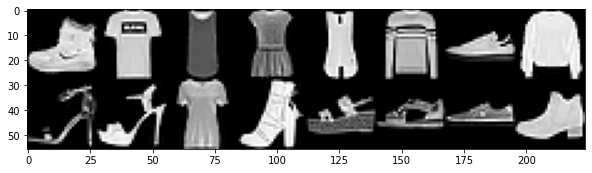

In [ ]:
plt.figure(figsize = (10,7))
# npimg : 이미지 넘파이 배열
# np.transpose 사용
plt.imshow(np.transpose(npimg, (1,2,0) ))

In [ ]:
print(labels) # 각각의 패션아이템 종류

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [ ]:
# 이미지들의 클래스들은 '티셔츠/윗옷, 바지', 스웨터', '드레스', '코트', '샌들. 셔츠, '운동화', '가방, '앵글부츠', 이렇게 10가지
# 데이터셋에서는 이름 대신에 숫자 번호로 레이블이 주어짐 -> 딕셔너리화
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


(28, 28)


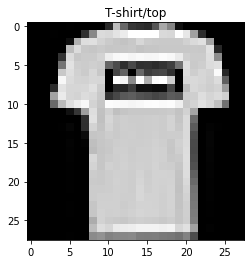

In [ ]:
# 개별 이미지 보기 (0~15)
idx = 1 #@param {"type":"number"}
item_img = images[idx] # 첫번째 이미지 꺼내기
item_npimg = item_img.squeeze().numpy() # squeeze하고 numpy를 통해 넘파이 행렬로 만들기
plt.title(CLASSES[labels[idx].item()]) # 종류 보기
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

# 인공신경망으로 패션 아이템 분류
* 심층 인공 신경망 `Deep Neural Network, DNN`
* 런타임 GPU 사용


## 환경설정

In [ ]:
import torch

# GPU 사용
torch.cuda.is_available() # 현재 컴퓨터에서 cuda(GPU)를 사용할 수 있는지 확인
# 런타임 유형 변경 → 하드웨어 가속기 → GPU

True

In [ ]:
# USE_CUDA가 True면 cuda를 입력해서, GPU 장치를 사용하고 아니면 CPU를 쓰겠다.
USE_CUDA = torch.cuda.is_available()
USE_CUDA

True

In [ ]:
# 환경에 따라서 cpu/ gpu를 알아서 설정하게 하는 코드
DEVICE = torch.device('cuda' if USE_CUDA else 'CPU')


In [ ]:
# 효율적 학습을 위해 데이터셋을 배치로 잘라서 사용함
BATCH_SIZE = 64
EPOCHS = 30

## 데이터셋 불러오기

In [ ]:
# 이미지를 변환 시켜주는 transform 정의
transform = transforms.Compose([
    transforms.ToTensor() # 변환할 방식을 추가
])

# 학습셋, 시험셋을 로딩 (다운로드)
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True, # T/F
    download  = True,
    transform = transform # 변환 설정
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

# 반복해서 불러올 때 배치 사이즈, 방식
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset, # 연결할 데이터셋을 결정
    batch_size  = BATCH_SIZE, # 배치 사이즈 (한 번에 불러올 미니 배치)
    shuffle     = True, # 섞을까말까.
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

In [ ]:
# model 을 클래스로 할 예정

# hidden layer가 3개인 neural network 구성
class Net(nn.Module):
    # 먼저 생성자에 model의 weight 변수들이 들어가는 연산(객체) 들을 선언
    def __init__(self): # 클래스를 통해서 생성될 객체 → self
        super(Net, self).__init__()

        ## nn.Linear 클래스는 선형 결합을 수행하는 객체를 만듬
        self.fc1 = nn.Linear(784, 256) # input이 784 x 256
        # (흑백의) 1 x 28 x 28 픽셀 이미지 →784 픽셀값을 한 점씩 입력받아서 weight를 행렬곱 해주고 bias을 더해서 값 256개를 출력
        # fc는 fully connected → 이전 레이어의 모든 노드가 다음 레이어의 모든 노드에 연결된 dense
        self.fc2 = nn.Linear(256, 128) # input 256, output 128
        self.fc3 = nn.Linear(128, 10) # input 128, output 10

    # 출력값 10개 각각은 클래스가 될 확률을 나타냄. 10개 중 값이 가장 큰 클래스가 이 모델의 예측값이 됨  
    def forward(self, x): # x는 입력되는 텐서
        # 데이터의 흐름을 정의
        # n, 색상, 세로, 가로 → 784 이외의 나머지는 임의의 값으로 지정 (-1, 784) # -1 : 배치 사이즈, 데이터 사이즈 등
        # 입력을 받아서 view함수를 사용, 랭크 1텐서로 변환
        x = x.view(-1, 784) # 28 x 28px 이미지 텐서를 1 x 784의 벡터로 수정함
        # fc1()과 fc2()를 거치게 할 것. 각각의 층은 ReLU function을 통해서 처리
        # F.relu == nn.ReLU (거의 동일, 취향 문제) > 가중치가 없는 연산          
        # nn.Linear → 선형결합 (weight)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # 마지막으로 fc3() 함수까지 거쳐 나온 값 10개
        x = self.fc3(x)
        return x

In [ ]:
# 주석 제거한 버전
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

* 모델 선언과 동시에 to() 함수로 연산을 어디서 수행할지 정할 수 있음
* to() 함수는 모델의 파라미터들을 지정한 장치의 메모리로 보내는 역할을 함
* 일반적으로 CPU만 사용한다면 필요 없지만, GPU를 사용하려면 to("cuda")로 지정하여 GPU의 메모리로 보내야 함
* 아무것도 지정하지 않으면 CPU에서 처리

In [ ]:
model = Net().to(DEVICE) # 기기에 맞는 (CPU, GPU) 환경을 넣어서 처리

In [ ]:
# 최적화 알고리즘 : 파이토치 내장 모듈인 optim.SGD를 사용
# SGD (확률적 경사하강법, stochastic gradient descent) : 모델 최적화를 확률적 경사하강법
# 모델 내부의 정보를 넘겨주는 model.parameters() 함수와 직접 설정한 학습률(lr)을 입력
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 학습을 위한 연산을 train 함수로 정의
# train : 학습할 model, 데이터를 공급해주는 train_loader, 최적화를 담당할 optimizer를 넣을 것
def train(model: nn.Module, train_loader, optimizer): # epoch 1번 = train 1번 = train 내부의 batch 사이즈별 학습이 따로 돌려짐
    
    # 학습 모드
    model.train() # ↔ model.eval() : 평가모드
    # 모드에 따라서 동작이 다른 파이토치 모듈
    # 배치를 반복하여서 훈련
    # enumerate(연속된 데이터) -> zip(인덱스, 값)
    for batch_idx, (data, target) in enumerate(train_loader):
        # data : 모델에 입력할 data (이미지 텐서), target : 해당 이미지의 분류값. 클래스.
        # 모델에 입력될 데이터 모양(shape): [배치크기(64), 색, 높이(세로), 넓이(가로)]
        # data.size() : [64, 1, 28, 28] <- 배치 데이터
        # 모델의 가중치를 보낸 장치(DEVICE) -> 학습 데이터도 같은 장치로 보내야 함
        data, target = data.to(DEVICE), target.to(DEVICE) # cuda 사용가능한 컴퓨터라면 GPU, 아니면 CPU

        # 배치를 처리할 때마다 기울기를 새로 계산해줘야함 -> optimizer.zero_grad()
        optimizer.zero_grad()
        
        # 학습 데이터에 대한 모델의 예측값을 output
        output = model(data)

        # output -> 오차를 구해서 개선
        # output & 레이블(target, 정답) 사이의 오차 구하기
        loss = F.cross_entropy(output, target) # 한 배치(64)에 대한 오차(손실)
        # ☆이진 교차 엔트로피 binary cross entropy : 클래스가 2개 (분류해야하는 대상이 2개)
        # ☆☆교차 엔트로피 cross entropy : 클래스가 3개 이상 (이번에는 10개)
        # F.cross_entropy -> 이것에 대한 기울기를 저장할 필요가 없어서 F 함수를 씀
        
        loss.backward() # 오차 역전파로 기울기 (gradient) 계산
        optimizer.step() # 계산한 기울기를 바탕으로 앞서 정의한 알고리즘에 맞추어 가중치를 수정

In [ ]:
# 주석 제거한 버전
def train(model: nn.Module, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
# 평가 함수 evaluate
# 모델의 일반화 정도 확인 + 학습을 언제 멈춰야할지 알아냄 (조기종료)
def evaluate(model, test_loader): 
    # epoch가 끝날 때마다 테스트셋으로 모델의 성능을 측정
    model.eval() # 1) 평가 모드

    test_loss = 0 # 테스트셋의 오차
    correct = 0 # 예측이 맞은 갯수를 담아줄 변수

    # torch.no_grad() -> 생성 / with가 끝나면 해당 객체, 기능을 close.
    with torch.no_grad(): # 기울기 계산 끄기
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE) # DEVICE로 데이터 보내기
            output = model(data) # 테스트 데이터의 예측값

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            # 평가를 위해서 교차 엔트로피를 거칠 때 reduction을 'sum'을 지정/ 모든 오차를 더해줌
            # 원래 default는 mean(평균)
            

            # 2) 정확도
            # 가장 큰 값을 가진 클래스가 모델의 예측값
            # 예측과 정답을 비교하여서 일치할 경우 -> correct에 1을 더함 
            # output.max() -> (가장 큰 값(0), 그 값이 있는 자리의 인덱스(1))
            print(output)
            # https://pytorch.org/docs/stable/generated/torch.Tensor.max.html
            pred = output.max(1, keepdim=True)[1] # max(차원)
            # print(pred)

            # 모델의 예측 패션 아이템과 레이블(정답)이 일치하는지는 eq (0, 1)
            print(pred.eq(target.view_as(pred)))
            correct += pred.eq(target.view_as(pred)).sum().item()
            # -> sum (모두 더하면 현 배치에서 모델을 맞춘 정답 개수 구함)
            # view_as -> 인수로 들어간 텐서의 모양으로 바꿔줌(정렬)
    # 배치별 총 오차와, 총 맞춘 개수를 합친 test_loss, correct

    # test_loss : 전체 데이터셋에 대한 오차 -> 배치별로 나눠져 있는 것의 합
    # correct : 맞힌 개수의 합
    # 총 정답 평균 -> 100을 곱해서 정확도 (accuracy) 구하기
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset) # 얼마나 맞췄는지
    return test_loss, test_accuracy

In [ ]:
# 에포크마다 학습과 테스트셋을 이용한 검증을 반복하고 결과를 출력
# 소요시간 확인  : 3분 38초
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer) # 최적화 담당하는 optimizer 사용 (없어도 됨)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        [ 4.4297e+00,  1.2704e+01,  1.9029e+00,  3.0028e+00,  1.8562e+00,
         -9.6598e+00, -1.7942e+00, -3.3447e+00, -1.8491e+00, -9.7687e+00],
        [ 5.8471e+00,  2.5590e+00,  1.0801e-01,  8.2351e+00, -7.3335e-01,
         -7.8932e+00,  2.7132e+00, -4.9157e+00,  8.3205e-01, -8.8060e+00],
        [-1.4165e+00, -7.5652e+00, -6.6517e+00, -5.0153e+00, -1.0553e+01,
          5.1455e+00, -2.7503e+00,  9.3928e+00,  3.0420e+00,  1.4635e+01],
        [ 1.8027e-03, -1.7239e+00, -1.8326e-01,  1.7670e-01, -3.1234e+00,
          4.3804e+00, -1.1067e+00,  2.6202e+00, -3.7569e-01, -1.3374e+00],
        [-3.8305e-01, -6.2292e+00,  1.9615e+00,  7.7478e-01,  4.5320e+00,
         -3.4573e-01,  8.0971e-01, -5.9345e+00,  1.2353e+01, -8.6544e+00],
        [-1.4283e+00, -5.8050e+00, -3.9714e+00, -3.0125e+00, -7.6937e+00,
          6.0400e+00, -1.9551e+00,  3.7109e+00,  3.2571e+00,  9.5500e+00],
        [ 9.8064e+00, -3.1882e+00,  2.3703e+00,  2.7400e+00,  1.1366e+

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(), # 이미지를 무작위로 수평 뒤집기 (뒤집는 것만으로 예제 수가 2배로 늚)
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)) # 정해진 임의의 상수로 정규화 진행
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)) # 정해진 임의의 상수로 정규화 진행
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# 드롭 아웃 적용을 위한 신경망 구조 수정
class Net(nn.Module):
    def __init__(self, dropout_p = 0.2): # 직접 설정할 수 있게 생성자로 받음 (기본값 0.2)
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        # 드롭아웃 비율을 결정하는 dropout_p 파라미터를 추가
        self.dropout_p = dropout_p
    def forward(self, x): # forward에 dropout 관련 설정 추가
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))

        # F.dropout() 함수는 가중치가 없으므로 torch.nn.functional 패키지에서 바로 가져와서 사용할 수 있음
        # 취향에 따라 nn.Dropout 클래스를 사용해도 무방
        # nn.Dropout은 내부적으로 F.dropout () 함수를 쓰며 self,training 등 몇 가지 내부 변수를 자동으로 적용해주는 모듈
        # nn.Dropout과 F.dropout()은 같은 기능의 클래스를 쓰느냐 함수를 쓰느냐 의 차이
        # 모델에는 학습과 평가 모드가 있음 → F.dropout () 함수는 모델의 모드에 따라 동작이 달라짐
        # 학습 모드에서만 드롭아웃을 하고 평가 모드에서는 모든 뉴런을 사용해야 하기 때문.
        # model.train ()과 model.eval() 함수를 호출하여 모드를 바꿀 때마다 모델 내부의 self.training 변수값이 True나 False로 바뀜
        # 이 모델에선 layer1 층을 지나면서 한 번, layer2 층을 지나며 다시 한 번 드롭아웃
        # 신경망 층의 출력 x와 학습인지를 알려주는 self.training, 그리고 드롭아웃 확률인 self. dropout_p를 입력해줌
        
        # 드롭아웃 추가

        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = F.relu(self.fc2(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = self.fc3(x)
        return x

In [ ]:
# 주석 제거한 버전
class Net(nn.Module):
    def __init__(self, dropout_p = 0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout_p = dropout_p
    def forward(self, x): 
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = self.fc3(x)
        return x

In [ ]:
# 드롭아웃 확률을 추가하여 모델 객체 생성 (모델을 인스턴스화)
model = Net(dropout_p=0.2).to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 데이터셋에 노이즈를 추가하거나 모델에 드롭아웃을 적용할 때,
# 최고 성능에 도달하는 데까지 걸리는 시간은 길어짐 ← 데이터셋이 늘고, 모델이 느리게 학습되기 때문
# 에포크를 늘려서 학습 → 정확도가 눈에 띄게 높이 시작해서 꾸준히 오랫동안 증가
# 시간소요 : 11분 32초(epochs =40번)
EPOCHS = 40
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
         -4.7874e+00,  2.7430e+00, -5.0364e+00,  2.9090e-01, -5.2866e+00],
        [ 2.1862e+00,  2.1369e+00, -5.1509e-01,  7.4840e+00,  7.9025e-01,
         -3.5487e+00,  1.6446e+00, -4.0762e+00, -1.5440e+00, -3.8751e+00],
        [-2.7994e+00, -7.6101e-01, -4.2250e+00, -3.4142e+00, -5.7436e+00,
          2.5734e+00, -4.8303e+00,  7.7826e+00, -1.6312e+00,  1.1768e+01],
        [-2.2593e+00, -2.1609e+00, -1.9540e+00, -1.0575e+00, -2.4400e+00,
          4.3159e+00, -3.0906e+00,  6.9866e+00,  1.8518e+00, -4.0748e-01],
        [ 9.0017e-02, -7.7444e-01,  9.7631e+00, -1.4345e+00,  1.1710e+01,
         -6.8439e+00,  6.9403e+00, -8.3444e+00, -1.7341e+00, -6.9941e+00],
        [-2.8558e+00, -6.6846e-01, -2.9103e+00, -2.3636e+00, -4.4413e+00,
          1.1929e+00, -4.2318e+00,  9.2066e+00,  6.1219e-01,  5.4596e+00],
        [ 1.4517e+00, -3.0249e+00,  9.3995e+00,  1.1261e-02,  7.5550e+00,
         -5.6636e+00,  8.6926e+00, -8.3050e+00, -1.4855e+00, -6.6900e+